In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

report = pd.read_csv('Retail_Reports_by_County_in_Colorado (1).csv')

jeffco = (report[report['county'] == 'Jefferson'].dropna(axis='columns'))

In [2]:
jeffco[jeffco['year'] == 2015]

,month,year,county,num_returns,gross_sales,retail_sales,state_net_taxable_sales
502,6,2015,Jefferson,18816,1975147.0,1598627.0,720662.0
792,3,2015,Jefferson,18197,1860088.0,1538921.0,668075.0
1422,11,2015,Jefferson,13033,1406345.0,1212720.0,640905.0
1555,2,2015,Jefferson,12556,1311250.0,1141207.0,541365.0
1665,5,2015,Jefferson,12787,1554232.0,1326800.0,692135.0
1712,8,2015,Jefferson,12973,1583496.0,1385842.0,737292.0
3141,1,2015,Jefferson,12576,1510809.0,1330121.0,599953.0
3148,4,2015,Jefferson,12666,1500278.0,1292287.0,637436.0
3254,10,2015,Jefferson,13010,1520146.0,1305967.0,680231.0
3466,7,2015,Jefferson,12937,1582582.0,1370804.0,706618.0


In [3]:
jeffco.loc[jeffco['year'] == 2015, 'gross_sales':'state_net_taxable_sales'] = jeffco.loc[jeffco['year'] == 2015, 'gross_sales':'state_net_taxable_sales'] * 1000

In [4]:
jeffco_years = jeffco.groupby('year').sum()

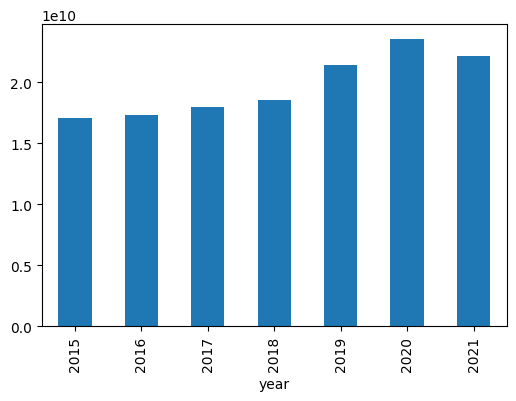

In [5]:
jeffco_years['retail_sales'].plot.bar()

In [13]:
jeffco_first = jeffco[(jeffco['month'] < 4 )].groupby('year').sum()
jeffco_second = jeffco[(jeffco['month'] < 7 )].groupby('year').sum()
jeffco_third = jeffco[(jeffco['month'] < 10 )].groupby('year').sum()
jeffco_fourth = jeffco.groupby('year').sum()

In [7]:
jeffco_first

,month,num_returns,gross_sales,retail_sales,state_net_taxable_sales
year,,,,,
2015,6,43329,4.682147e+09,4.010249e+09,1.809393e+09
2016,6,46230,4.512290e+09,3.834161e+09,1.850426e+09
2017,6,49778,4.714410e+09,4.053662e+09,1.953067e+09
2018,6,53777,4.953006e+09,4.201577e+09,1.988151e+09
2019,6,71742,5.691091e+09,4.820670e+09,2.074469e+09
2020,6,107017,6.134616e+09,5.283772e+09,2.286417e+09
2021,6,136387,6.564422e+09,5.537942e+09,2.415708e+09


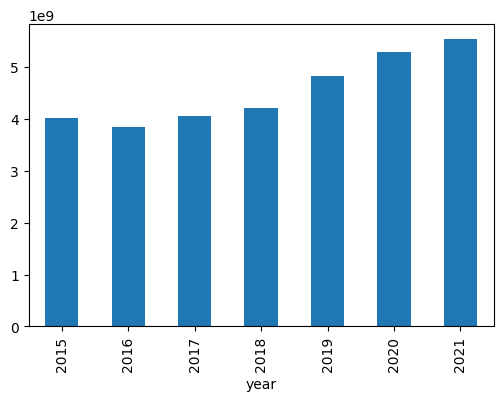

In [9]:
jeffco_first['retail_sales'].plot.bar()
years = [year for year in range(2015, 2022)]

In [ ]:
years

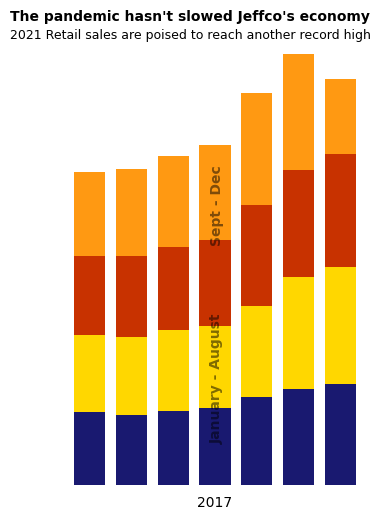

In [14]:
fig, ax=plt.subplots(figsize=(4, 6))

fig.text(0, 0.9, "The pandemic hasn't slowed Jeffco's economy", weight='bold')
fig.text(0, 0.87, "2021 Retail sales are poised to reach another record high", size=9)
fig.text(0.5, 0.2, "January - August", alpha=0.5, rotation=90, weight='bold')
fig.text(0.5, .53, "Sept - Dec", alpha=0.5, rotation=90, weight='bold')


ax.bar(years, jeffco_fourth['retail_sales'], color="#FF9912", width=0.75)
ax.bar(years, jeffco_third['retail_sales'], color="#C83200", width=0.75)
ax.bar(years, jeffco_second['retail_sales'], color="#FFD700", width=0.75)
ax.bar(years, jeffco_first['retail_sales'], color="#191970", width=0.75)
ax.set_yticklabels([])
ax.set_xticklabels(['2015','','2017','','2019','','2021'])
for side in ['top', 'bottom', 'left', 'right']:
    ax.spines[side].set_visible(False)
ax.tick_params(left=0, bottom=0)

plt.show()